In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from lazypredict.Supervised import LazyRegressor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
preCovid = pd.read_csv('/content/daily_crime_during_PRE-COVID.csv', index_col=0)
preCovid.sample(5)

,date,daily_crime_count,CT_ARSON_DR,CT_ASSAULT_DR,CT_BURGLARY_DR,CT_HOMICIDE_DR,CT_MOTOR_THEFT_DR,CT_ROBBERY_DR,CT_SEX_ABUSE_DR,CT_THEFT_FROM_CAR_DR,CT_THEFT_FROM_OTHER_DR,CL_WARD_1_DR,CL_WARD_2_DR,CL_WARD_3_DR,CL_WARD_4_DR,CL_WARD_5_DR,CL_WARD_6_DR,CL_WARD_7_DR,CL_WARD_8_DR,CO_SHIFT_MORNING_DR,CO_SHIFT_EVENING_DR,CO_SHIFT_MIDNIGHT_DR
16,2017-01-17,97,0,5,9,1,5,5,1,41,30,10,18,4,10,13,13,17,12,39,42,16
748,2019-01-19,67,0,3,5,1,5,4,0,32,17,10,12,2,6,15,9,8,5,19,20,28
760,2019-01-31,51,0,3,4,0,2,3,0,19,20,6,9,1,7,5,7,8,8,16,19,16
387,2018-01-23,90,0,1,6,0,4,7,1,38,33,15,17,4,12,11,9,15,7,30,43,17
160,2017-06-10,77,0,2,4,0,5,4,1,24,37,17,12,4,6,11,15,9,3,28,37,12


In [3]:
X = preCovid.loc[:, preCovid.columns != 'date']
y = preCovid['daily_crime_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [4]:
#!pip install lazypredict

In [5]:
preCovid_lazy = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
preCovid_models, preCovid_predictions = preCovid_lazy.fit(X_train, X_test, y_train, y_test)
print(preCovid_models)

100%|██████████| 42/42 [00:04<00:00,  8.61it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HuberRegressor                               1.00       1.00  0.00        0.19
OrthogonalMatchingPursuit                    1.00       1.00  0.00        0.01
LinearSVR                                    1.00       1.00  0.00        0.02
LinearRegression                             1.00       1.00  0.00        0.02
LassoLarsIC                                  1.00       1.00  0.00        0.03
LassoLarsCV                                  1.00       1.00  0.00        0.05
LarsCV                                       1.00       1.00  0.00        0.05
Lars                                         1.00       1.00  0.00        0.02
RANSACRegressor                              1.00       1.00  0.00        0.02
OrthogonalMatchingPursuitCV                  1.00       1.00  0.00        0.02
TransformedTargetRegressor                   1.00   

In [6]:
# sklearn linear regression model
preCovid_lr = LinearRegression()
preCovid_lr.fit(X_train, y_train)
y_pred = preCovid_lr.predict(X_test)

preCovid_mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', preCovid_mse)
preCovid_r2= r2_score(y_test, y_pred)
print('R squared value:', preCovid_r2)

Mean squared error: 2.7630474800635096e-28
R squared value: 1.0


In [7]:
# statsmodel OLS analysis
columns = preCovid.columns
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:      daily_crime_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.569e+30
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:15:34   Log-Likelihood:                 33805.
No. Observations:                1161   AIC:                        -6.757e+04
Df Residuals:                    1142   BIC:                        -6.748e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.28

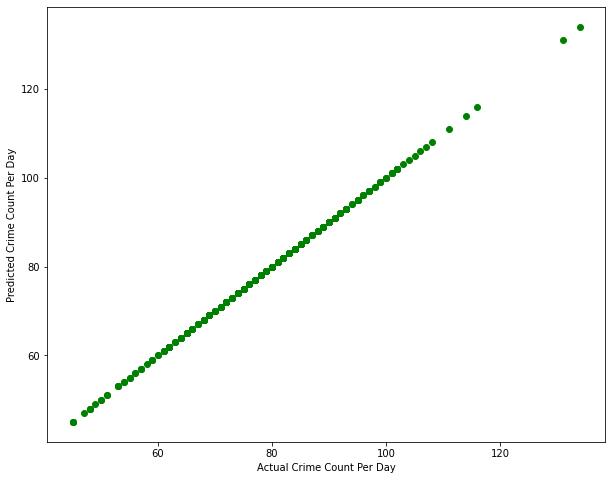

In [15]:
plt.figure(figsize = (10,8))
plt.scatter(y_test,y_pred, color = 'green')
plt.xlabel('Actual Crime Count Per Day')
plt.ylabel('Predicted Crime Count Per Day')
plt.show()

In [25]:
# Lasso Regression
parameters = {'alpha':[0.5, 1]}
lasso = Lasso()
lasso = GridSearchCV(lasso, parameters)
lasso.fit(X_train, y_train)
pred=lasso.predict(X_test)
print("Best Estimator for Lasso Model:\n",lasso.best_estimator_)
print("Best Score for Lasso Model:\n", lasso.best_score_)

Best Estimator for Lasso Model:
 Lasso(alpha=0.5)
Best Score for Lasso Model:
 0.9999949631621512


In [26]:
# Ridge Regression
ridge = Ridge()
ridge = GridSearchCV(ridge, parameters)
ridge.fit(X_train, y_train)
pred=ridge.predict(X_test)
print("Best Estimator for Ridge Model:\n",ridge.best_estimator_)
print("Best Score for Ridge Model:\n", ridge.best_score_)

Best Estimator for Ridge Model:
 Ridge(alpha=0.5)
Best Score for Ridge Model:
 0.9999999987979089
